# Investigation of patterns affecting the success of the game

The customer is an online store selling games. Plans advertising campaigns for next year.

The purpose of the study is to identify patterns that determine the success of the game. This will allow the store to bet on a potentially popular product and plan advertising campaigns.

For research, we have at our disposal historical data on game sales, user and expert ratings, genres and platforms up to 2016.

## Data Preparation and Exploration

In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [590]:
data = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_04/games.csv')

In [591]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5830,Touhoku Daigaku Mirai Kagaku Gijutsu Kyoudou K...,PSP,2005.0,Misc,0.00,0.00,0.30,0.00,NaN,NaN,NaN
15541,StormLover Karen!!,PSP,2011.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
45,Super Mario 64,N64,1996.0,Platform,6.91,2.85,1.91,0.23,NaN,NaN,NaN
8930,Crash: Twinsanity,XB,2004.0,Platform,0.11,0.03,0.00,0.01,66.0,8.7,E
13214,Metroid Prime: Federation Force,3DS,2016.0,Action,0.02,0.01,0.01,0.00,64.0,5.1,T
10429,The Book of Unwritten Tales,PC,2009.0,Adventure,0.00,0.08,0.00,0.02,82.0,8.2,T
9704,Colony Wars III: Red Sun,PS,2000.0,Simulation,0.07,0.05,0.00,0.01,NaN,NaN,NaN
6496,The Amazing Spider-Man 2 (2014),PS3,2014.0,Action,0.06,0.14,0.02,0.04,NaN,NaN,NaN
11246,Million God,PS2,2002.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E


In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [593]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [594]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [595]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [596]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Summary

In this section, we have reviewed the data provided for the study. We looked at the unique values of the columns and their number. As it was found, the table consists of 16715 rows and 11 columns. In the columns with user ratings, critics and age rating, there is a significant part of the omissions.

## Data preprocessing and research

In [597]:
# For the convenience of work, we will reduce the column names to lowercase.
data.columns = data.columns.str.lower()

In [598]:
# Delete a small part of the data in which there are gaps in the information about the name of the game and where its release is.
data.dropna(subset = ['name', 'year_of_release'], inplace=True)

In [599]:
# Information about the uncertain user rating will be replaced with omissions.
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [600]:
# Replace the data type in the column with information about the release year.
data['year_of_release'] = data['year_of_release'].astype('int')

In [601]:
# Calculate the total sales and save the results in a separate column.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Summary

After processing the data, we get a table consisting of 16444 rows and 12 columns. It was decided to leave the existing omissions, since it is difficult to predict information about estimates based on the available data, and replacing such a large number of omissions with median or average values will significantly distort the available information and negatively affect the results of the study.

## Exploratory Data Analysis

### Game production volumes

In [603]:
# Count the number of games released for each year.
games_per_year = data.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

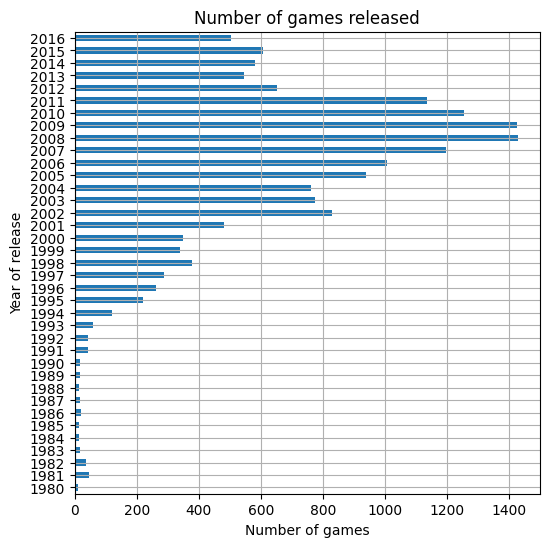

In [604]:
games_per_year.plot.barh(figsize = (6, 6), grid=True, title='Number of games released')
plt.xlabel('Number of games')
plt.ylabel('Year of release');

#### Summary
For clarity, we will display the received data on a bar chart. According to the schedule , the following conclusions can be drawn:

1. In 2002, apparently, there is a revolution in the gaming industry, as the volume of games produced is almost doubled and has a stable growth until 2008. 

2. The years from 2006 to 2011 are the record holders - more than 1000 games are released per year. 

3. Since 2009, the number of games produced has been on the decline and by 2016 returns to the level of 2001 - approximately 500 games per year.

After analyzing the graph, we can say that data for all years will be needed for the results of the study, since even at the time when a negligible number of games were released per year, real hits could come out that had excellent sales volumes.

### Game sales volumes on popular platforms

In [605]:
# Calculate the 5 most popular platforms by summing up the sales volumes of games for them.
top_5_platform = data.pivot_table(
    index= 'platform', values= 'total_sales', aggfunc= 'sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Game sales characteristics for the top 5 platforms
--------------------------------------------
platform          DS         PS2         PS3         Wii        X360
count      11.000000   12.000000   11.000000   11.000000   12.000000
mean       72.980000  102.796667   84.667273   81.016364   80.103333
std        61.673155   79.405729   54.637565   79.136330   57.484408
min         0.020000    0.450000    3.600000    0.180000    1.520000
25%        14.140000   35.977500   34.360000    6.170000   29.045000
50%        85.020000   89.705000  107.360000   59.650000   91.995000
75%       124.975000  170.900000  124.725000  144.960000  124.032500
max       146.940000  211.810000  156.780000  206.970000  170.030000


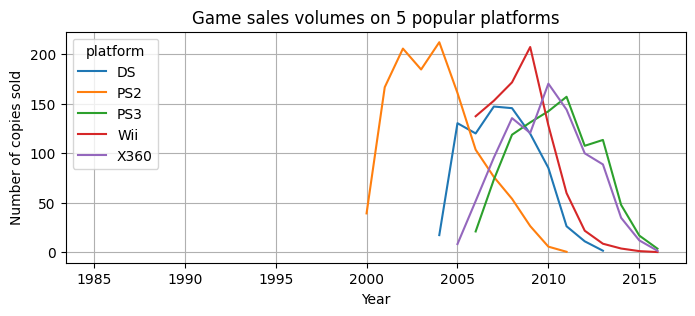

In [606]:
print('Game sales characteristics for the top 5 platforms')
print('--------------------------------------------')
sales_on_top5 = data.query('platform in @top_5_platform.index.values').pivot_table(
    index= 'year_of_release', columns= 'platform', values= 'total_sales', aggfunc= 'sum')

print(sales_on_top5.describe())

sales_on_top5.plot(
    figsize=(8, 3), grid=True, title='Game sales volumes on 5 popular platforms')
plt.xlabel('Year')
plt.ylabel('Number of copies sold'); 

#### Comment
As you can see from the resulting graph, even on platforms with the largest total sales, their volumes begin to fall on average after five years. It can be assumed that the average lifetime of the platform and the release of games for it is 5 years.

In [607]:
report_1 = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
median_total_sales = report_1['total_sales'].median()
report_1 = report_1.query('total_sales > @median_total_sales')
report_1 = report_1.groupby(['platform']).agg({'year_of_release': 'nunique'})
lifetime = int(report_1.median())
print()
print('The median value of the lifetime of the platform (with a minimum level of sales: {} million.) - {} years.'.format(
    median_total_sales, lifetime))


The median value of the lifetime of the platform (with a minimum level of sales: 16.055 million.) - 5 years.


#### Comment
In order to confirm the hypothesis about the average lifetime of the platform - 5 years, first we group the data by years and platforms and summarize the total number of sales of games for each platform. Let's calculate the median value of game sales for each platform, set it as the lower threshold for filtering and get rid of smaller values (we can assume that the year when games were sold more than the median value was successful in sales). For the resulting table, we will calculate the number of remaining years for each platform and calculate the median value for it.

In [608]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

platforms = data.query('platform in @top_5_platform.index.values')['platform'].unique()

size = math.ceil(math.sqrt(len(platforms)))

all_sales = data.query('platform in @top_5_platform.index.values').groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=(platforms))

row = 0
col = 0

for i,p in enumerate(platforms):        
    
    if i % size == 0:
        col = 1
        row += 1
    else:
        col += 1
    data_ = all_sales[all_sales['platform'] == p]
    fig.add_trace(go.Scatter(x = data_['year_of_release'], y = data_['total_sales']),
              row=row, col=col)
    

fig.update_layout(height=700, width=700,
                  title_text="Distribution of sales by year")

fig.show()

### Research analysis of data for the current time period

In [609]:
# Set the actual period for the study from 2013 to 2016.
# Make a slice and save the frame in the new actual_data variable.
actual_data = data.query('year_of_release >= 2013')

In [610]:
# Get acquainted with the received actual_data.
actual_data.info()
actual_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


#### Research of current gaming platforms

In [611]:
actual_platform = actual_data.pivot_table(
    index= 'platform', values= 'total_sales', aggfunc=['count', 'sum', 'mean'])
actual_platform.columns = ['count', 'sum', 'mean']
actual_platform = actual_platform.sort_values(
    by='count', ascending=False)
actual_platform

,count,sum,mean
platform,,,
PS4,392,314.14,0.801378
PSV,358,32.99,0.092151
PS3,345,181.43,0.525884
3DS,303,143.25,0.472772
XOne,247,159.32,0.645020
PC,189,39.43,0.208624
X360,186,136.80,0.735484
WiiU,115,64.63,0.562000
PSP,67,3.50,0.052239


##### Comment
We will get information about the platforms on which the games were released in the current time period. We will also have access to information about the number of games, the volume of copies sold and the average number of copies per released game for these platforms.

Characteristics of game sales for current platforms
-------------------------------------------------
platform        3DS    DS         PC         PS3         PS4       PSP  \
count      4.000000  1.00   4.000000    4.000000    4.000000  3.000000   
mean      35.812500  1.54   9.857500   45.357500   78.535000  1.166667   
std       18.128338   NaN   3.701102   48.898675   40.567917  1.710010   
min       15.140000  1.54   5.250000    3.600000   25.990000  0.120000   
25%       24.620000  1.54   7.702500   13.515000   58.435000  0.180000   
50%       35.770000  1.54  10.450000   32.290000   84.625000  0.240000   
75%       46.962500  1.54  12.605000   64.132500  104.725000  1.690000   
max       56.570000  1.54  13.280000  113.250000  118.900000  3.140000   

platform        PSV       Wii       WiiU       X360       XOne  
count      4.000000  4.000000   4.000000   4.000000   4.000000  
mean       8.247500  3.415000  16.157500  34.200000  39.830000  
std        3.596205  3.765355   8.12

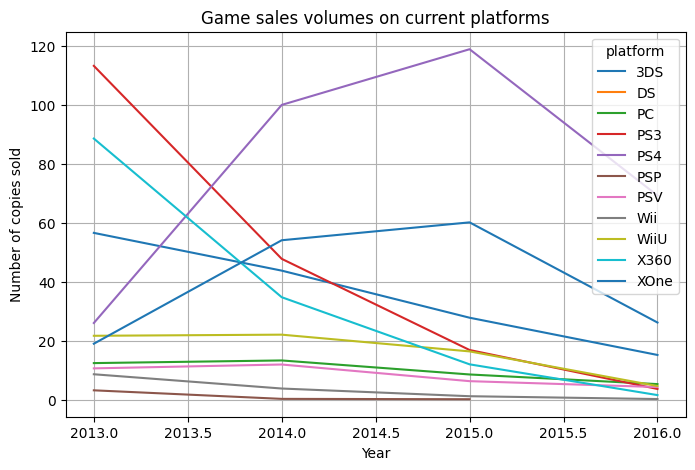

In [612]:
print('Characteristics of game sales for current platforms')
print('-------------------------------------------------')
sales_on_actual_platform = actual_data.pivot_table(
    index= 'year_of_release', columns= 'platform', values= 'total_sales', aggfunc= 'sum')

print(sales_on_actual_platform.describe())

sales_on_actual_platform.plot(
    figsize=(8, 5), grid=True, title='Game sales volumes on current platforms')
plt.xlabel('Year')
plt.ylabel('Number of copies sold'); 

##### Comment
Among the platforms in the period under review, five sales leaders can be identified - PS4, PS3, Zone, 3DS, X360. However, at the same time, it can be seen on the chart that sales of games on all the platforms under consideration tend to decrease. Perhaps only sales of games on PS4 will be profitable, but adhering to the general trend, they will also decline rapidly. Sales of PC and PC games may seem relatively stable, but their figures are very low and remain at the level of 10-8 million copies sold in the period under review.

Characteristics of game sales by platform
-------------------------------------------------
platform         3DS        DS          PC         PS3         PS4        PSP  \
count     303.000000  8.000000  189.000000  345.000000  392.000000  67.000000   
mean        0.472772  0.192500    0.208624    0.525884    0.801378   0.052239   
std         1.381347  0.172026    0.352304    1.451939    1.609456   0.059768   
min         0.010000  0.030000    0.010000    0.010000    0.010000   0.010000   
25%         0.040000  0.067500    0.030000    0.040000    0.060000   0.015000   
50%         0.090000  0.150000    0.080000    0.150000    0.200000   0.020000   
75%         0.280000  0.252500    0.230000    0.510000    0.730000   0.070000   
max        14.600000  0.510000    3.050000   21.050000   14.630000   0.240000   

platform         PSV        Wii        WiiU        X360        XOne  
count     358.000000  23.000000  115.000000  186.000000  247.000000  
mean        0.092151   0.593913    0.5

<AxesSubplot: title={'center': 'total_sales'}, xlabel='platform'>

Text(0.5, 1.0, 'Global sales of games on current platforms')

Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Number of copies sold')

(0.0, 6.0)

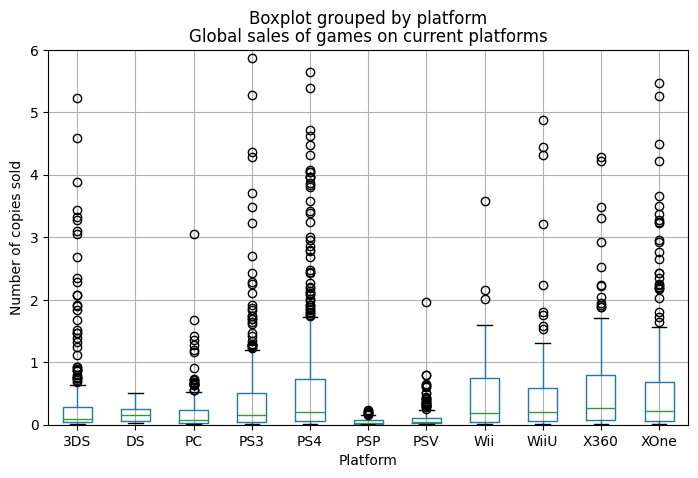

In [613]:
print('Characteristics of game sales by platform')
print('-------------------------------------------------')
print(actual_data.pivot_table(index='name', columns='platform', values='total_sales').describe())

actual_data.boxplot('total_sales', by='platform', figsize=(8, 5))
plt.title('Global sales of games on current platforms')
plt.xlabel('Platform')
plt.ylabel('Number of copies sold')
plt.ylim(0,6)

##### Summary
The following conclusions can be drawn from the resulting graph:
1. 75% of games on the presented platforms do not reach the mark of 0.8 million copies sold.
2. The highest median values of sales volumes have platforms X360, XOne, PS4 and WiiU, which may indicate the stability of sales of games for these platforms.
3. Total sales volumes mainly depend on the number of games released on the platform.

In [614]:
# To confirm the relationship between the number of games released and their sales volumes, we calculate the correlation level - 0.74.
actual_platform['count'].corr(actual_platform['sum'])

0.7443167975591408

#### Research on the impact of user reviews and critics on sales

<AxesSubplot: title={'center': 'The ratio of sales and user rating of games for PS4'}, xlabel='user_score', ylabel='total_sales'>

Text(0.5, 0, 'User rating')

Text(0, 0.5, 'Sales volumes')

Correlation of the parameters under consideration: -0.03


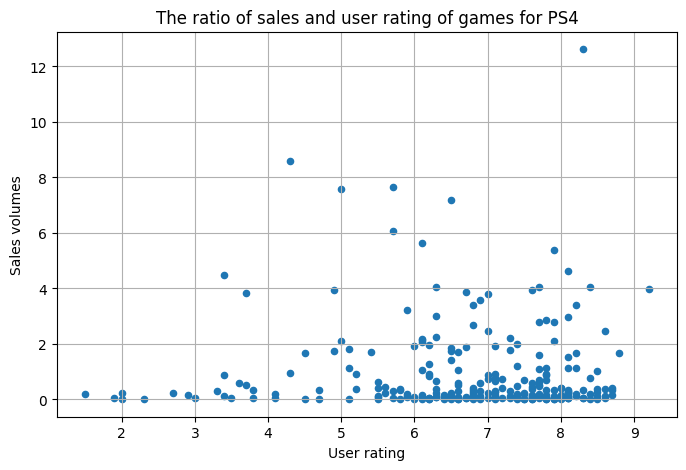

In [615]:
actual_data.query('platform == "PS4"').plot(
    x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='The ratio of sales and user rating of games for PS4')
plt.xlabel('User rating')
plt.ylabel('Sales volumes')
corr_sales_to_user_score = actual_data.query(
    'platform == "PS4"')['user_score'].corr(
    actual_data.query('platform == "PS4"')['total_sales'])
print('Correlation of the parameters under consideration: {:.2f}'.format(corr_sales_to_user_score))

##### Comment
The correlation of - 0.03 and the scatter plot tell us that the sales of games on PS4 are completely independent of the user rating.

<AxesSubplot: title={'center': "The ratio of sales volumes and critics' ratings of games for PS4"}, xlabel='critic_score', ylabel='total_sales'>

Text(0.5, 0, "Critics' ratings")

Text(0, 0.5, 'Sales volumes')

Correlation of the parameters under consideration: 0.41


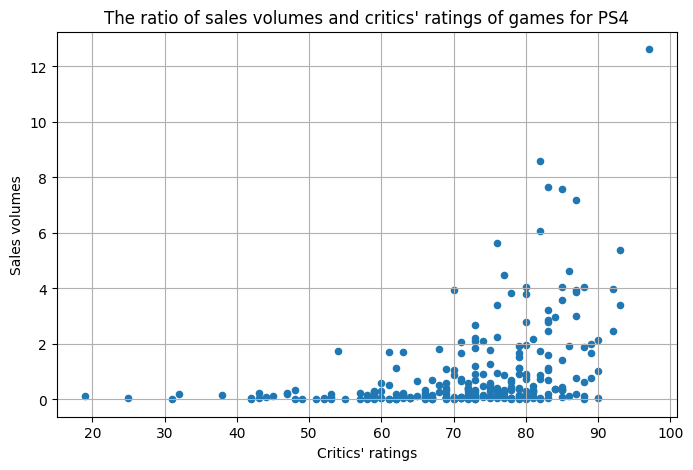

In [616]:
actual_data.query('platform == "PS4"').plot(
    x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title="The ratio of sales volumes and critics' ratings of games for PS4")
plt.xlabel("Critics' ratings")
plt.ylabel('Sales volumes')
corr_sales_to_critic_score = actual_data.query(
    'platform == "PS4"')['critic_score'].corr(
    actual_data.query('platform == "PS4"')['total_sales'])
print('Correlation of the parameters under consideration: {:.2f}'.format(corr_sales_to_critic_score))

##### Comment
Unlike the user rating, on this chart you can see that the best-selling games, as a rule, have good ratings from critics. Despite this, a large number of games with a good rating and low sales volumes, as well as a correlation of 0.41, tell us about the weak relationship of the parameters under consideration.

<AxesSubplot: title={'center': 'The ratio of sales volumes and user rating of games for current platforms'}, xlabel='user_score', ylabel='total_sales'>

Text(0.5, 0, 'User rating')

Text(0, 0.5, 'Sales volumes')

Correlation of the parameters under consideration: -0.00


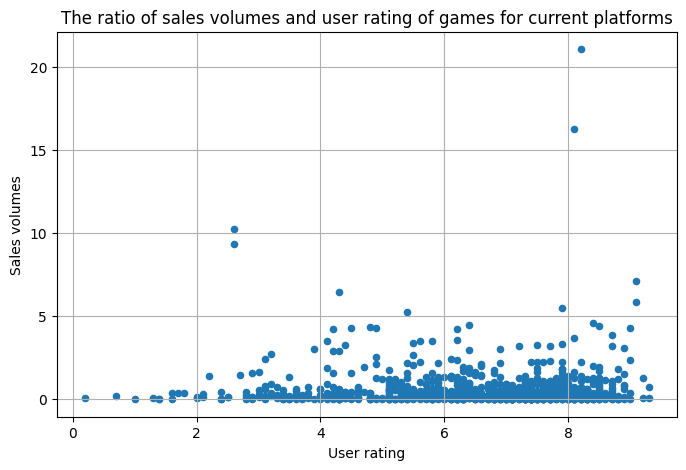

In [617]:
actual_data.query('platform != "PS4"').plot(
    x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='The ratio of sales volumes and user rating of games for current platforms')
plt.xlabel('User rating')
plt.ylabel('Sales volumes')
corr_sales_to_user_score_all = actual_data.query(
    'platform != "PS4"')['user_score'].corr(
    actual_data.query('platform != "PS4"')['total_sales'])
print('Correlation of the parameters under consideration: {:.2f}'.format(corr_sales_to_user_score_all))

Correlation of the parameters under consideration: 0.28


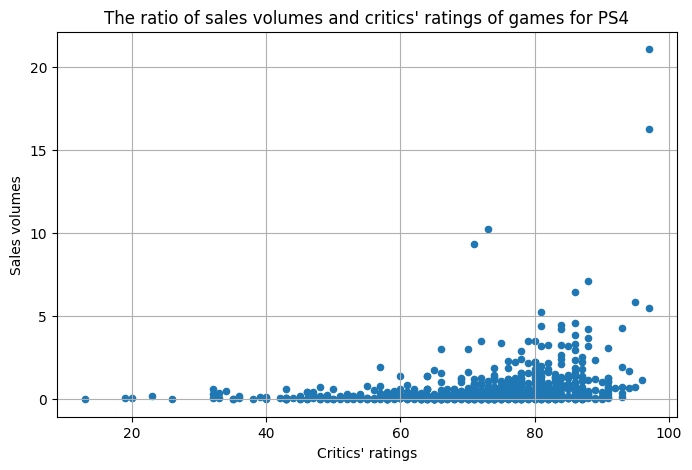

In [618]:
actual_data.query('platform != "PS4"').plot(
    x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title="The ratio of sales volumes and critics' ratings of games for PS4")
plt.xlabel("Critics' ratings")
plt.ylabel('Sales volumes')
corr_sales_to_critic_score_all = actual_data.query(
    'platform != "PS4"')['critic_score'].corr(
    actual_data.query('platform != "PS4"')['total_sales'])
print('Correlation of the parameters under consideration: {:.2f}'.format(corr_sales_to_critic_score_all));

##### Summary
The dependence of sales volumes and ratings of critics / users for the popular PS4 and other platforms is almost the same, as indicated by low correlation indicators and indicators of the parameters under consideration scattered throughout the scattering diagram.

#### Research of games with distribution by genre

In [619]:
actual_genre = actual_data.pivot_table(index= 'genre', values= 'total_sales', aggfunc=['count', 'sum', 'mean'])
actual_genre.columns = ['Количество игр', 'Объемы продаж', 'Среднее значение']
actual_genre = actual_genre.sort_values(by='Количество игр', ascending=True)
actual_genre
corr_actual_genre = actual_genre['Количество игр'].corr(actual_genre['Объемы продаж'])
print('------------------------------------------------')
print('Correlation of the number and volume of sales of games: {:.2f}'.format(corr_actual_genre))
actual_genre.info()

,Количество игр,Объемы продаж,Среднее значение
genre,,,
Puzzle,17,3.17,0.186471
Strategy,56,10.08,0.180000
Simulation,62,21.76,0.350968
Platform,74,42.63,0.576081
Fighting,80,35.31,0.441375
Racing,85,39.89,0.469294
Misc,155,62.82,0.405290
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972


------------------------------------------------
Correlation of the number and volume of sales of games: 0.84
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Puzzle to Action
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Количество игр    12 non-null     int64  
 1   Объемы продаж     12 non-null     float64
 2   Среднее значение  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 384.0+ bytes


<AxesSubplot: title={'center': 'Distribution by genre'}, ylabel='genre'>

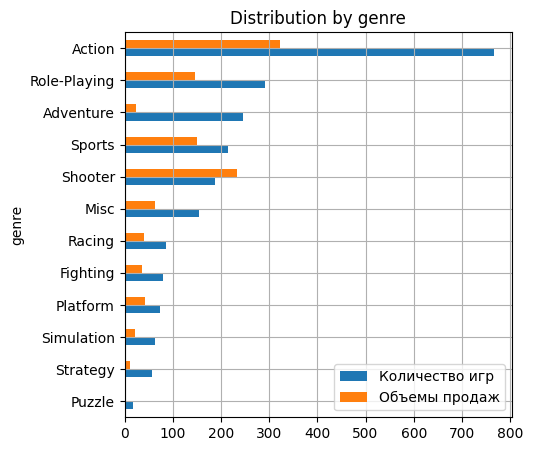

In [620]:
actual_genre[['Количество игр', 'Объемы продаж']].plot.barh(
    figsize = (5, 5), grid=True, title='Distribution by genre')

##### Summary
After analyzing the data distributed by genre, we can say the following:
1. The dependence of sales volumes on the number of games produced is high.
2. The top three sales leaders among genres are as follows: 1."Action", 2."Shooter", 3."Sports".
3. Despite the leadership in sales, the "Action" genre has an average of 420 thousand copies per released game, which cannot be said about the "Shooter" genre, where one released game has an average of 1.25 million copies.
4. The absolute anti-leader in sales is the genre "Adventure" with 96 thousand copies per released game.

### Summary

After conducting a research analysis of the data , we can come to the following conclusions:
- The gaming market is going through a crisis, the indicators are striving to the level of 2001 for the release of new games. Perhaps the main streams of production and sales of games are moving to smartphones, the same devices that almost everyone has, unlike special gaming platforms. It can be assumed that the analysis of the smartphone games market will bear fruit.
- Of the remaining gaming platforms, only the PS4 is in the final stage of the "platform life" cycle and next year sales of games on it will still bring profit. At the same time, we saw that the new platform has a tendency to sharply increase the sales of games for it, therefore, in order to "stay afloat", there is a need for constant monitoring of the market of game console manufacturers.
- Game sales volumes are almost always dependent on the number of games released on a particular platform.
- Oddly enough, the ratings of critics and users practically do not affect sales volumes. Apparently, estimates appear later than the main sales volumes provided by high-quality advertising campaigns.
- The Shooter genre is the leader in copies sold per released game, which cannot be said about the Adventure genre, with its lowest sales.

## Average portrait of a gaming platform user

In [621]:
# Function for creating a table of the Top 5 platforms
def top_5_platforms(column):
    top_5_platforms = actual_data.pivot_table(
    index= 'platform', values= column, aggfunc= 'sum').sort_values(
    by=column, ascending=False).head(5)
    print(top_5_platforms)
    print(top_5_platforms.plot(kind='bar', title= column))

# Function to create a table of the Top 5 genres
def top_5_genres(column):
    top_5_genres = actual_data.pivot_table(
    index= 'genre', values= column, aggfunc= 'sum').sort_values(
    by=column, ascending=False).head(5)
    print(top_5_genres)
    print(top_5_genres.plot(kind='bar', title= column))

### Top 5 gaming platforms by region

TOP 5 Gaming Platforms in North America
-----------------------------------------
          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
AxesSubplot(0.125,0.11;0.775x0.77)

TOP 5 gaming platforms in Europe
-----------------------------------------
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
AxesSubplot(0.125,0.11;0.775x0.77)

TOP 5 Gaming Platforms in Japan
-----------------------------------------
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88
AxesSubplot(0.125,0.11;0.775x0.77)


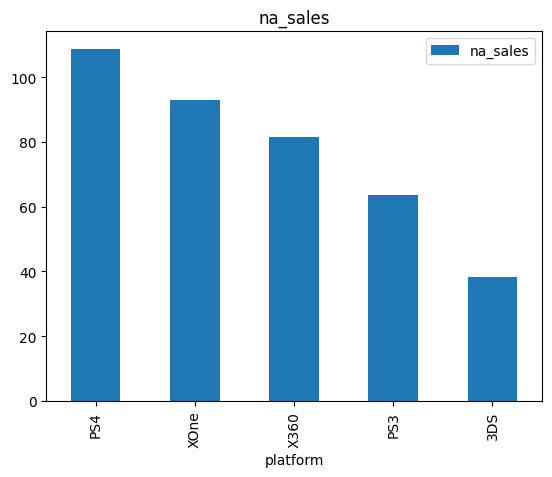

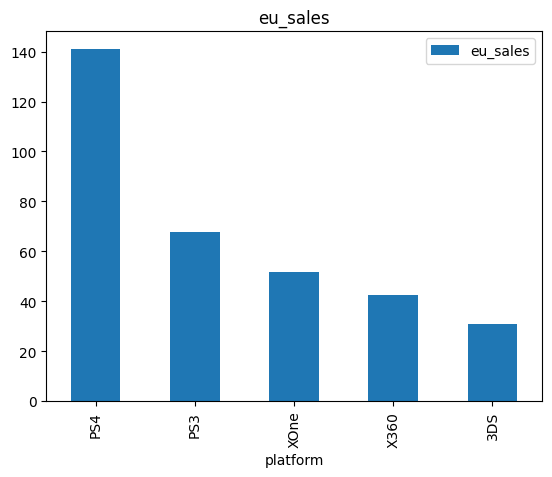

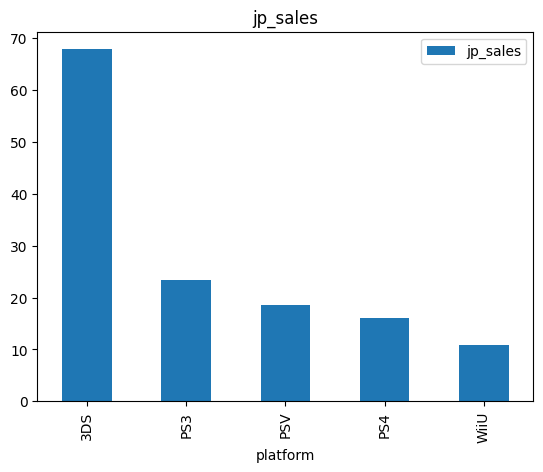

In [622]:
print('TOP 5 Gaming Platforms in North America')
print('-----------------------------------------')
top_5_platforms('na_sales')
print()
print('TOP 5 gaming platforms in Europe')
print('-----------------------------------------')
top_5_platforms('eu_sales')
print()
print('TOP 5 Gaming Platforms in Japan')
print('-----------------------------------------')
top_5_platforms('jp_sales')

#### Summary
Despite the fact that the PS4 is a gaming platform produced by Japan, it has received real recognition in Europe, where players with a large margin from other gaming platforms prefer to buy games on it. In Japan itself, a significant part of the games are purchased on the 3DS mobile gaming platform, perhaps with the pace of life in this country, there are significantly fewer players there and it is more convenient for them to use mobile gaming devices. In the North American region, there is a more moderate distribution between platforms - the local XOne and X360 lag behind the PS4 leader by a small margin.

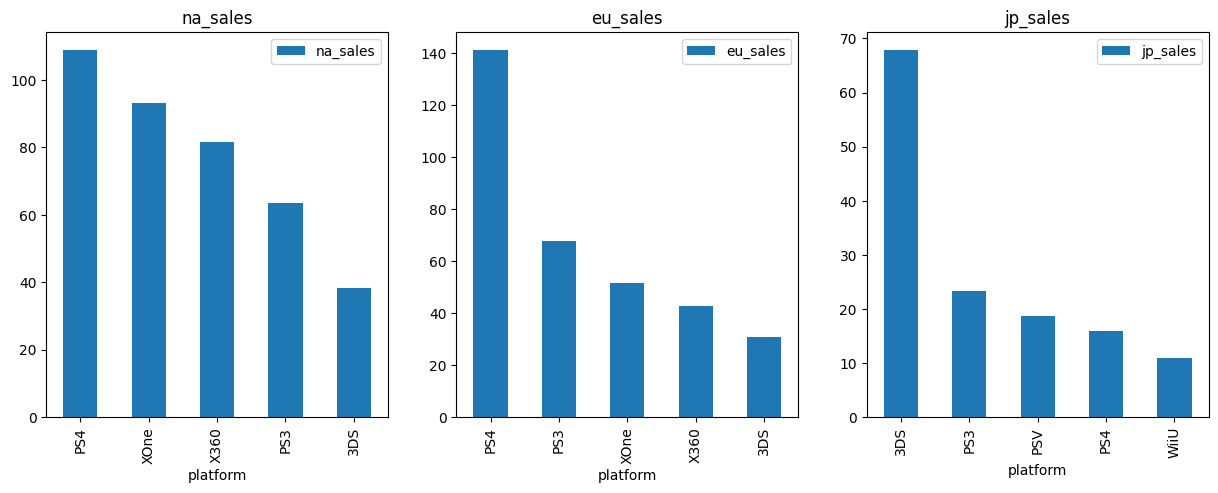

In [623]:
regs = ['na_sales','eu_sales','jp_sales']

fig, axes = plt.subplots(1,3,figsize=(15,5))

for r,ax in zip(regs,axes.flat):
    top_5_platforms = actual_data.pivot_table(
        index= 'platform', values=r, aggfunc= 'sum').sort_values(
        by=r, ascending=False).head(5)
    _ = (top_5_platforms.plot(kind='bar', title=r,ax=ax))

### Top 5 game genres by region

TOP 5 Game Genres in North America
-----------------------------------------
              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
AxesSubplot(0.125,0.11;0.775x0.77)

TOP 5 game genres in Europe
-----------------------------------------
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
AxesSubplot(0.125,0.11;0.775x0.77)

TOP 5 Game genres in Japan
-----------------------------------------
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61
AxesSubplot(0.125,0.11;0.775x0.77)


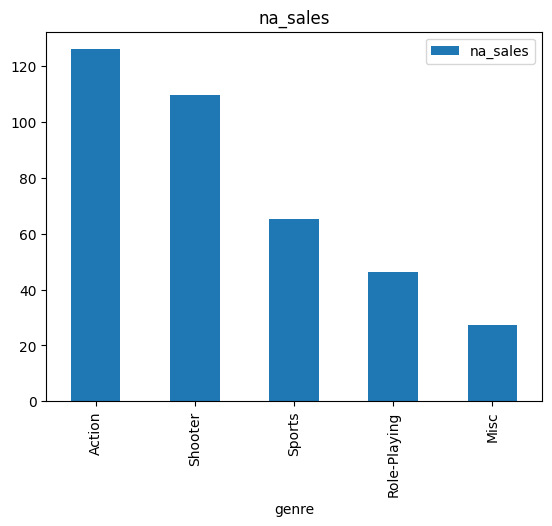

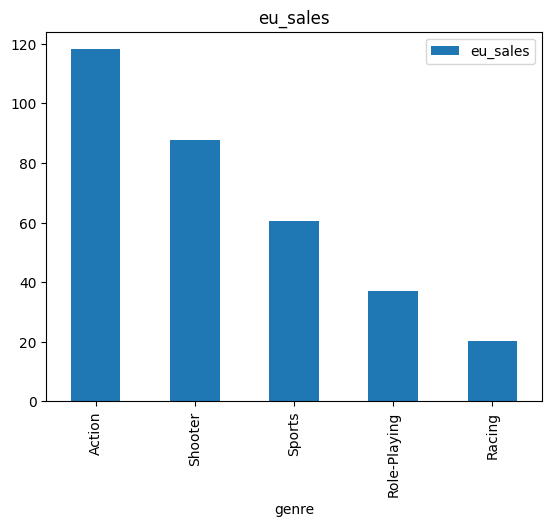

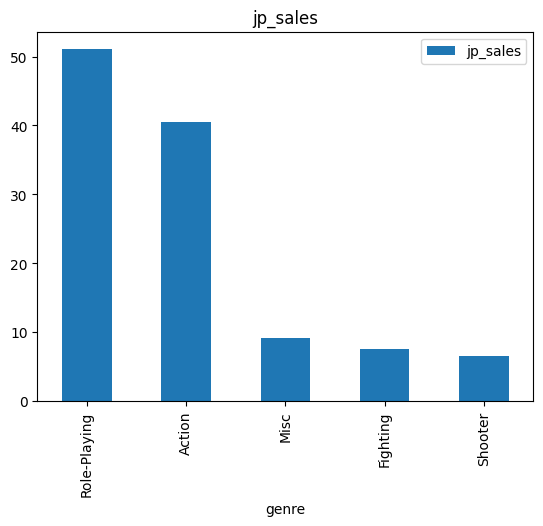

In [624]:
print('TOP 5 Game Genres in North America')
print('-----------------------------------------')
top_5_genres('na_sales')
print()
print('TOP 5 game genres in Europe')
print('-----------------------------------------')
top_5_genres('eu_sales')
print()
print('TOP 5 Game genres in Japan')
print('-----------------------------------------')
top_5_genres('jp_sales')

#### Summary
If the users of North America and Europe are in solidarity in choosing a game genre - the top three are Action, Shooter and Sports with almost equal values, then in Japan Role-Playing games are more preferred. In general, the Action genre occupies key positions in all regions and is most likely the most profitable for game manufacturers.

### The impact of the ESRB rating on sales by region

In [625]:
actual_data['rating'] = actual_data['rating'].fillna('RP')

In [626]:
ESRB = actual_data.pivot_table(
    index= 'rating', 
    values= ['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc= ['mean'])
ESRB

mean                    
        eu_sales  jp_sales  na_sales
rating                              
E       0.276026  0.050132  0.261755
E10+    0.169405  0.023373  0.215238
M       0.393821  0.038238  0.447724
RP      0.080768  0.087052  0.091525
T       0.125976  0.061832  0.149520

<AxesSubplot: title={'center': 'Sales volume of games divided by ratings in different regions'}, xlabel='rating'>

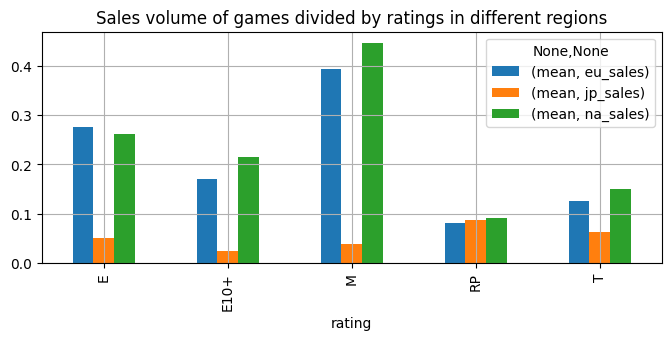

In [627]:
ESRB.plot(kind="bar", stacked=False, grid=True, figsize=(8, 3), 
          title='Sales volume of games divided by ratings in different regions')

#### Summary
As it was already established earlier, in Japan they play less and in all age categories almost equally. Sales volumes for all age categories in Europe and North America are almost the same, it can be assumed that a significant part of the players in these regions are older and more often purchase games with a rating of M (+17). In general, according to the data obtained, it is difficult to answer the question whether the ESRB rating affects sales in certain regions, since we do not know about the strictness of control and compliance with ESRB requirements in different countries of these regions. Subject to strict compliance with the rating rules, we can only judge the age distribution of players by region.

### Summary

Having studied the current data on the preferences of players in certain regions, it is possible to draw conclusions:
1. The average player in Europe and North America is similar in many ways:
- he is mostly over 17 years old;
 - prefers to play on PS4;
 - gives an advantage to games in the Action and Shooter genres.
_______________________________________________________________________________________________
2. The average Japanese player, due to the prevailing mentality in the country, which is very different from the European and North American, has the following characteristics:
 - - plays games of all age groups equally;
 - prefers the 3DS mobile gaming platform;
 - likes to play Role-Playing games.

## Hypothesis testing

### Hypothesis 1: "The average user ratings of the Xbox One and PC platforms are the same."

H₀ - The average user ratings of the Xbox One and PC platforms are the same.

H₁ - Average user ratings of the Xbox One and PC platforms differ.

In [628]:
xone_user_score = actual_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_user_score = actual_data.query('platform == "PC" and user_score > 0')['user_score']

In [629]:
alpha = 0.05 # standard critical level of statistical significance
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=True)

print('Average Xbox One User Rating: {:.1f}'.format(xone_user_score.mean()))
print('Average PC user rating: {:.1f}'.format(pc_user_score.mean()))
print()
print('p-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Average Xbox One User Rating: 6.5
Average PC user rating: 6.3

p-value: 0.14012658403611647

Failed to reject the null hypothesis


the p-value is greater than the critical level of statistical significance, which tells us about the equality of the two aggregates, and therefore it is impossible to refute the null hypothesis. The average user ratings of the Xbox One and PC platforms are the same.

### Hypothesis 2: "Average user ratings of Action and Sports genres are different."

H₀ - Average user ratings of the Action and Sports genres are the same.

H₁ - Average user ratings of the Action and Sports genres are different.

In [630]:
action_user_score = actual_data.query('genre == "Action" and user_score > 0')['user_score']
sports_user_score = actual_data.query('genre == "Sports" and user_score > 0')['user_score']

In [631]:
alpha = 0.05 # standard critical level of statistical significance
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=True)

print('Average user rating of the Action genre: {:.1f}'.format(action_user_score.mean()))
print('Average user rating of the Sports genre: {:.1f}'.format(sports_user_score.mean()))
print()
print('p-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Average user rating of the Action genre: 6.8
Average user rating of the Sports genre: 5.2

p-value: 1.0517832389140023e-27

Reject the null hypothesis


the p-value is significantly less than the critical level of statistical significance, which tells us about the inequality of the two aggregates, and therefore we reject the null hypothesis. The average user ratings of the Action and Sports genres are different.

### Summary

Having checked the hypotheses put forward, we draw the following conclusions:
- The average user ratings of the Xbox One and PC platforms are the same;
- Average user ratings of Action and Sports genres are different.

## General Conclusion and Recommendations

Summing up the research, we can say that the patterns that affect the success of the game differ depending on the sales region. Given that the markets of North America and Europe are similar in many respects, two main groups can be distinguished:

   1. Europe and North America:
        - Action genre is the best-selling, Shooter is the most paid off;
        - Games with an age rating of M are the best-selling;
        - Preferred gaming platform is PS4.
   2. Japan:
        - Game sales in this region are extremely low compared to Europe and North America;
        - Role-Playing games are the most popular;
        - The age rating basically does not affect sales in this country;
        - The vast majority of games are sold on the 3DS mobile gaming platform.

______________________________________________________________________________________________
Regarding general observations and trends, the following can be distinguished:

   1. The production rates of new games for gaming platforms are on the decline and reach the level of 2001;
   2. There is practically no dependence of sales volumes on the ratings of critics and users;
3. Sales figures for all current platforms are falling, at the moment there is not a single gaming platform, sales of games for which would show growth.
   
______________________________________________________________________________________________
Based on the above, we can give the following recommendations to the business:

   1. It is necessary to monitor the market for the production of new gaming platforms. Considering that at the moment all current platforms are at the end of their life cycle, it can be assumed that a new and promising gaming platform will be released in the near future.
   2. The gaming industry is not just about selling games to gaming platforms. Taking into account the active development of the technical characteristics of smartphones, their availability and practicality, it is necessary to pay attention to the market for the production of games for Android and iOS.